In [ ]:
# Identifying components of cell

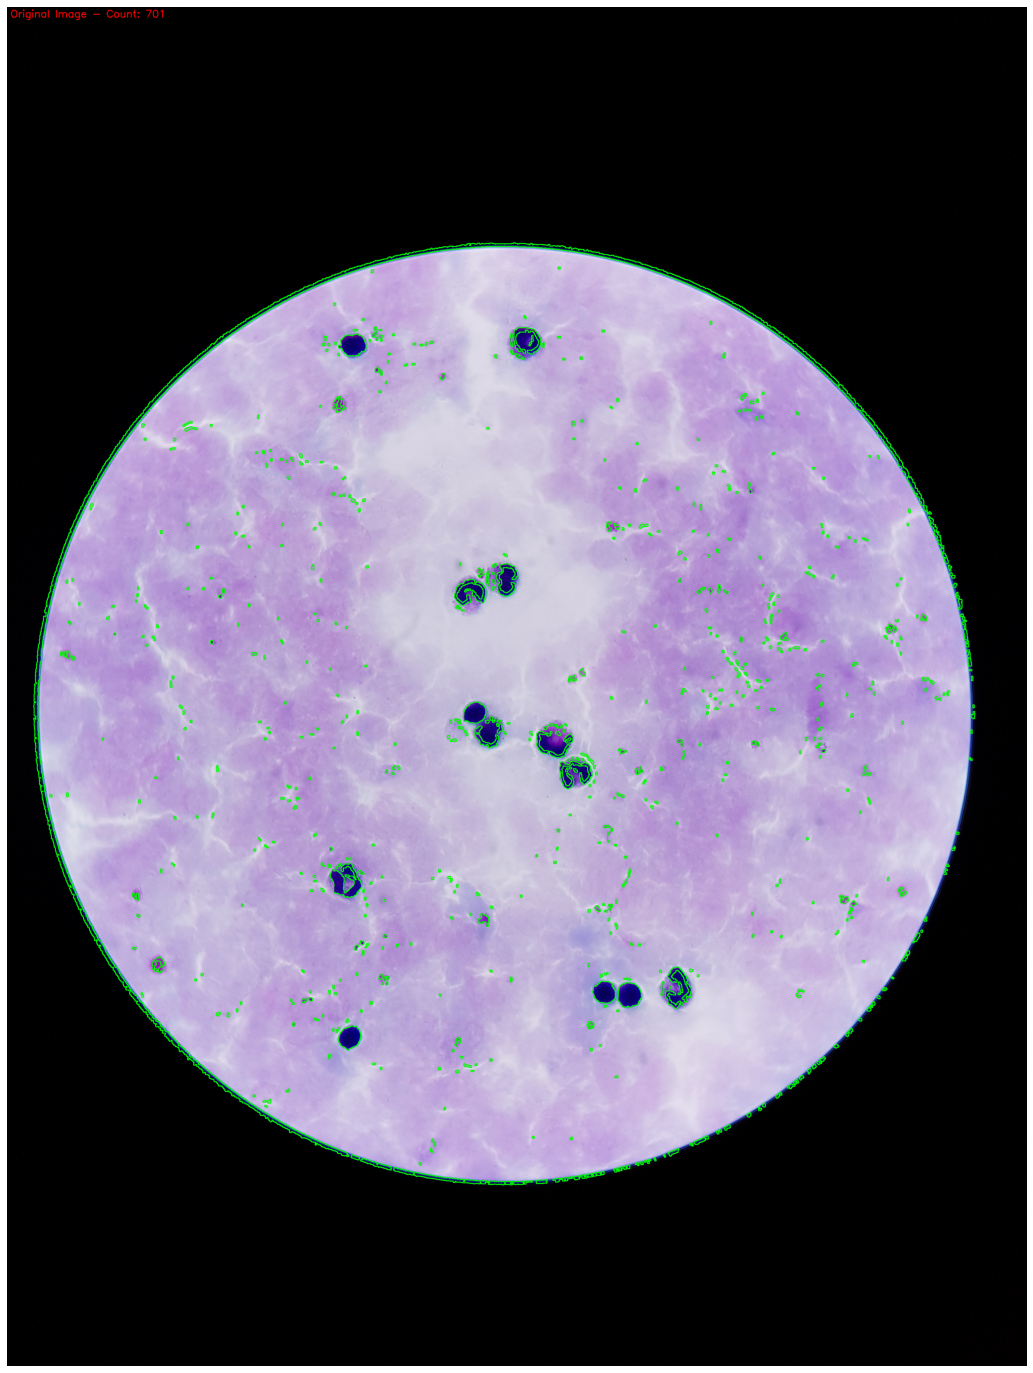

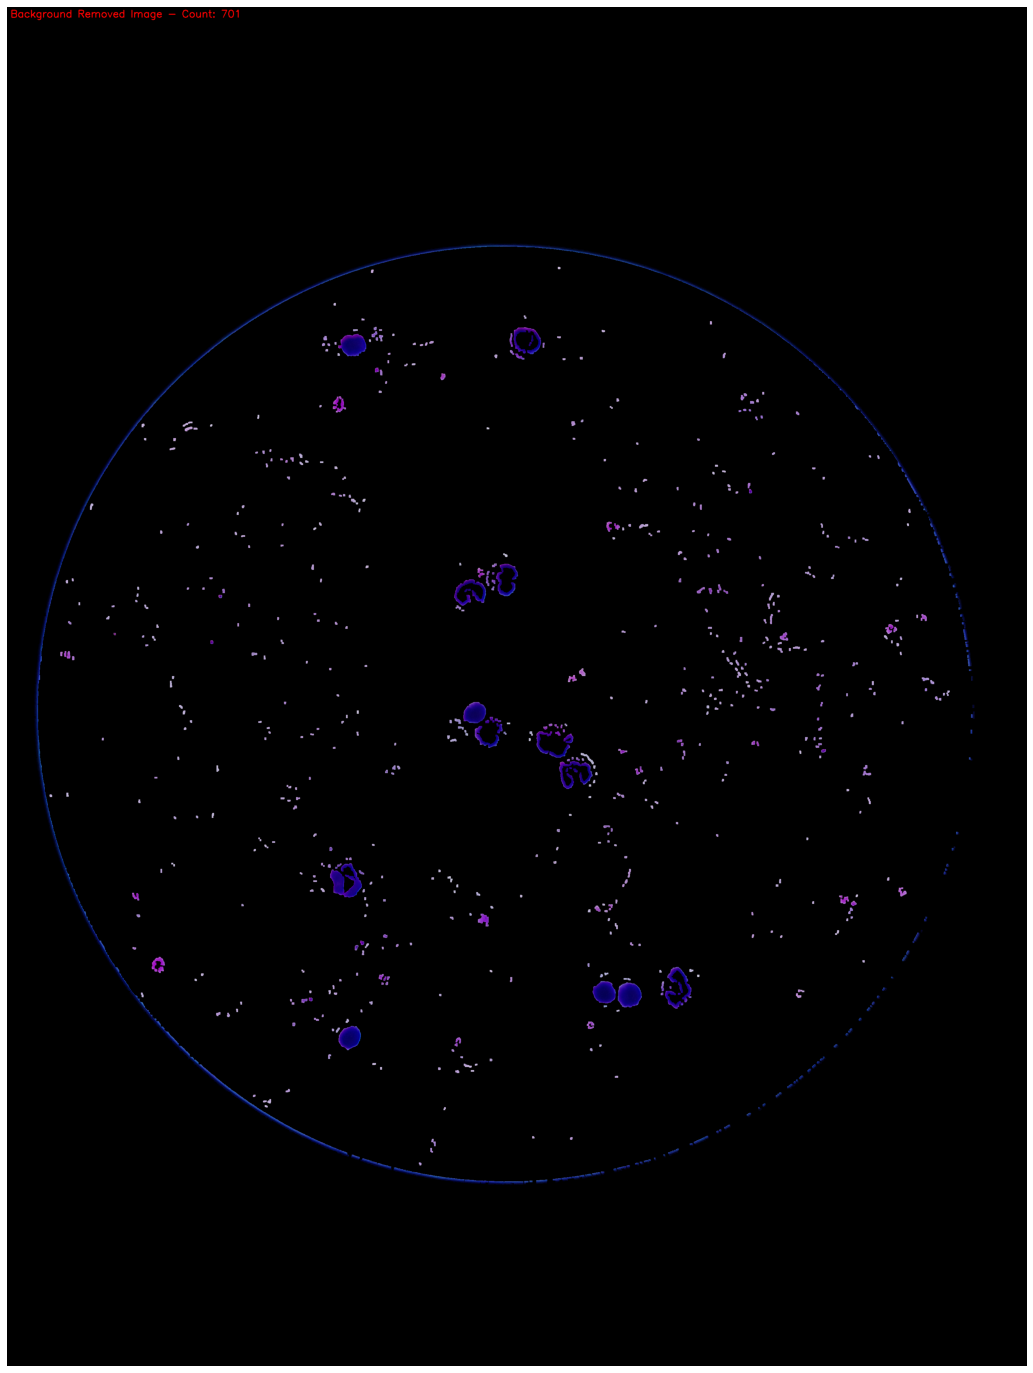

701


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('20170607_160610.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to segment the foreground (cells) from the background
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological operations to remove noise and close gaps between cells
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours in the processed image
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove small noise
min_area = 30  # Adjust as needed
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Filter contours based on aspect ratio to remove potential artifacts
aspect_ratio_threshold = 0.1  # Adjust as needed
filtered_contours = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    if aspect_ratio > aspect_ratio_threshold:
        filtered_contours.append(cnt)

# Create a mask for the background removed image
mask = np.zeros_like(gray)
cv2.drawContours(mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Generate the background removed image
background_removed = cv2.bitwise_and(image, image, mask=mask)

# Draw contours on the original image
cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), thickness=2)

# Count the number of objects (cells)
object_count = len(filtered_contours)

# Display the original image with count
cv2.putText(image, f'Original Image - Count: {object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
plt.figure(figsize=(30, 25))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the background removed image with count
cv2.putText(background_removed, f'Background Removed Image - Count: {object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
plt.figure(figsize=(30, 25))
plt.imshow(cv2.cvtColor(background_removed, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(object_count)



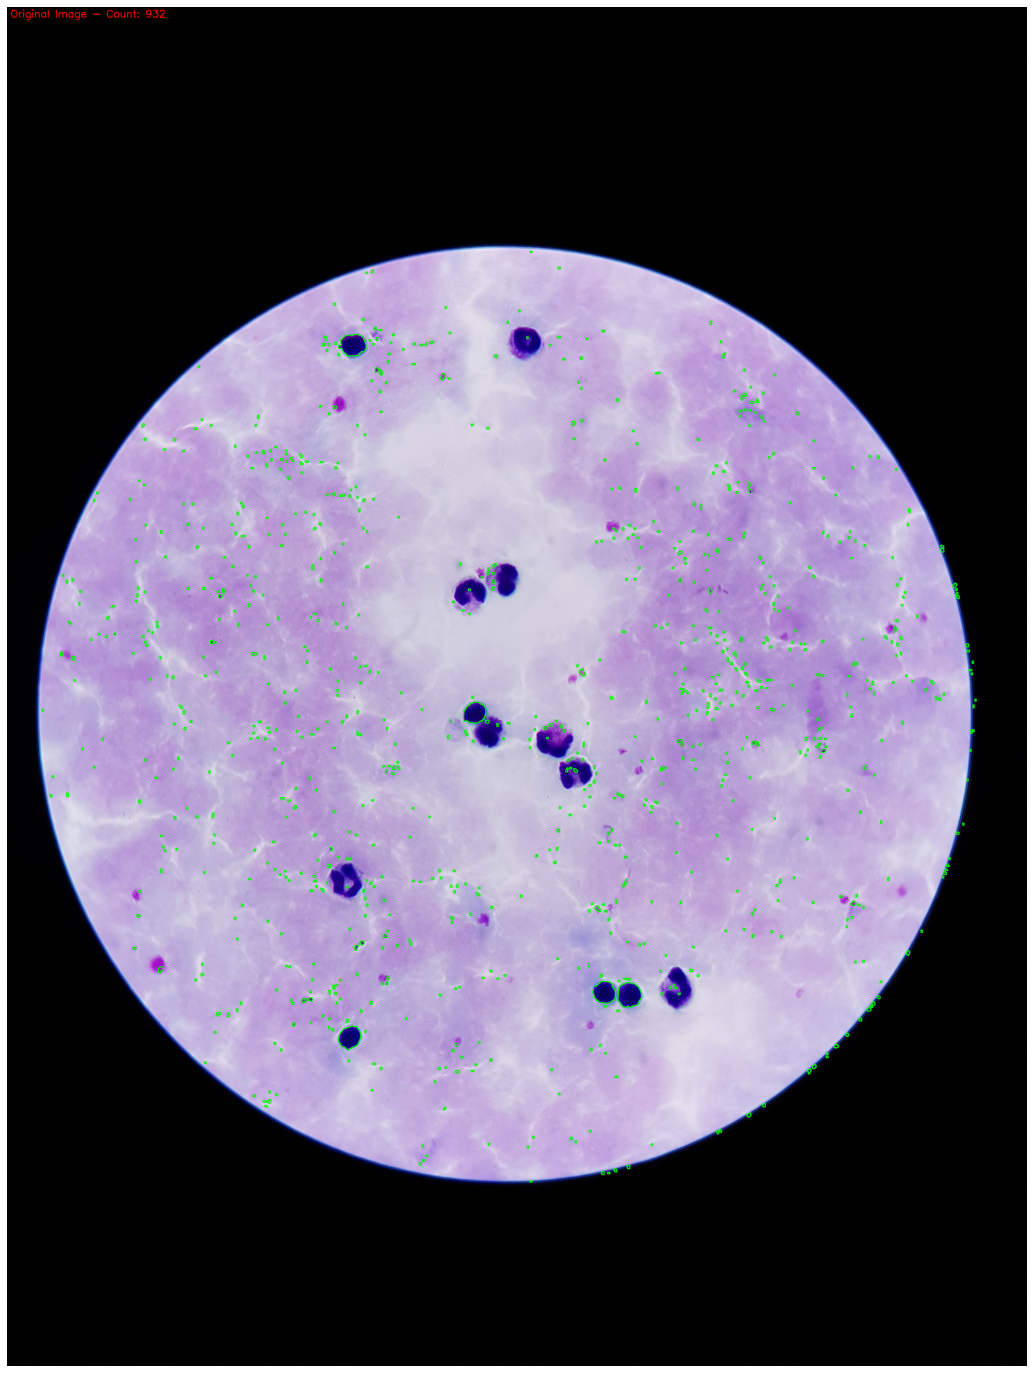

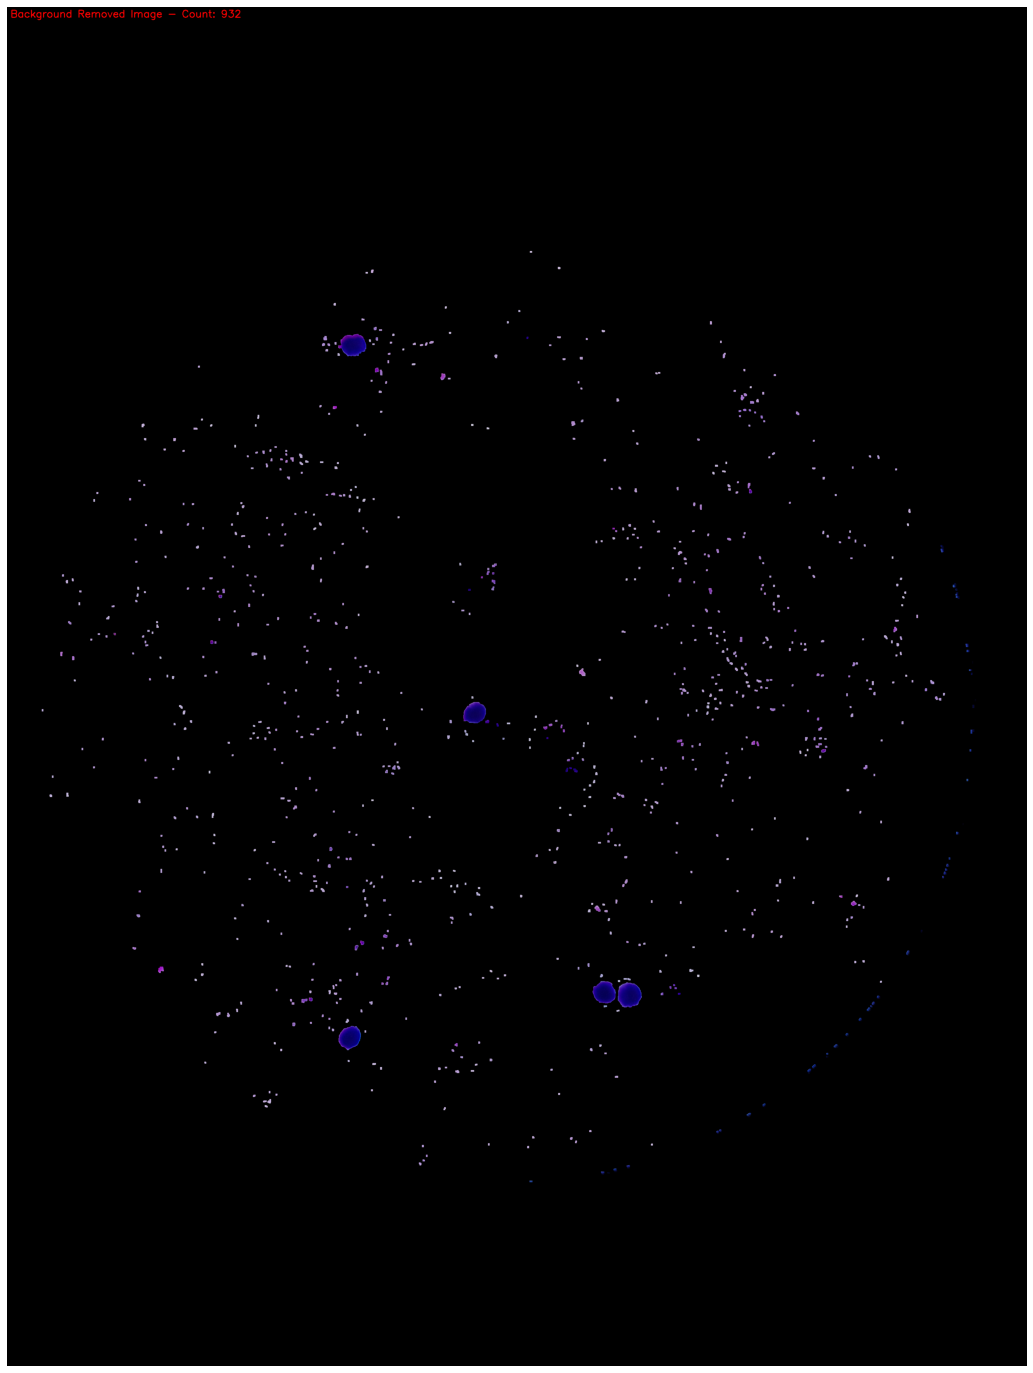

932
932


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('20170607_160610.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to segment the foreground (cells) from the background
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological operations to remove noise and close gaps between cells
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours in the processed image
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

def filter_contours(cnts, min_area, aspect_ratio_threshold, circularity_threshold, solidity_threshold):
  """
  Filters contours based on area, aspect ratio, circularity, and solidity.
  """
  filtered_contours = []
  for cnt in cnts:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * area / (perimeter * perimeter)  # Perfect circle = 1
    solidity = cv2.contourArea(cnt) / cv2.contourArea(cv2.convexHull(cnt))  # Perfect shape = 1
    if area > min_area and aspect_ratio > aspect_ratio_threshold and circularity > circularity_threshold and solidity > solidity_threshold:
      filtered_contours.append(cnt)
  return filtered_contours

# Filter contours with adjusted parameters
filtered_contours = filter_contours(contours, min_area=20, aspect_ratio_threshold=0.1, circularity_threshold=0.6, solidity_threshold=0.6)  # Adjust these values as needed

# Create a mask for the background removed image
mask = np.zeros_like(gray)
cv2.drawContours(mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Generate the background removed image
background_removed = cv2.bitwise_and(image, image, mask=mask)

# Draw contours on the original image
cv2.drawContours(image, filtered_contours, -1, (0, 255, 0), thickness=2)

# Count the number of objects (cells)
object_count = len(filtered_contours)

# Display the original image with count
cv2.putText(image, f'Original Image - Count: {object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
plt.figure(figsize=(30, 25))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the background removed image with count
cv2.putText(background_removed, f'Background Removed Image - Count: {object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
plt.figure(figsize=(30, 25))
plt.imshow(cv2.cvtColor(background_removed, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(object_count)

print(object_count)
